In [74]:
!gdown --id 197Ehbg2F3qqgNWZNHaiJ0S3GdDr4tV80

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=197Ehbg2F3qqgNWZNHaiJ0S3GdDr4tV80
To: /content/Emissions.csv
100% 476k/476k [00:00<00:00, 50.7MB/s]


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Load Data

In [76]:
df_asli=pd.read_csv('Emissions.csv')
df_asli

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [77]:
df_asli.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [78]:
df_asli.duplicated().sum()

1103

In [79]:
df_asli.drop_duplicates(inplace=True)

In [80]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Instantiate the LocalOutlierFactor model
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Select the columns for outlier detection
columns = ['Fuel Consumption Comb (mpg)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Engine Size(L)', 'Cylinders']
df_out = df_asli[columns]

# Fit the model and obtain the outlier scores
outlier_scores = clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_

# Identify the indices of outliers
outlier_indices = np.where(outlier_scores == -1)[0]

# Copy the original DataFrame
df = df_asli.copy()

# Reset the index of df_cleaned
df.reset_index(drop=True, inplace=True)

# Apply log-transform to outlier values
df.loc[outlier_indices, columns] = np.log(df.loc[outlier_indices, columns])

# Print the updated DataFrame
df


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,0.693147,1.386294,AS5,Z,2.292535,1.902108,2.140066,3.496508,196
1,ACURA,ILX,COMPACT,2.400000,4.000000,M6,Z,11.200000,7.700000,9.600000,29.000000,221
2,ACURA,ILX HYBRID,COMPACT,1.500000,4.000000,AV7,Z,6.000000,5.800000,5.900000,48.000000,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500000,6.000000,AS6,Z,12.700000,9.100000,11.100000,25.000000,255
4,ACURA,RDX AWD,SUV - SMALL,3.500000,6.000000,AS6,Z,12.100000,8.700000,10.600000,27.000000,244
...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.000000,4.000000,AS8,Z,10.700000,7.700000,9.400000,30.000000,219
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.000000,4.000000,AS8,Z,11.200000,8.300000,9.900000,29.000000,232
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.000000,4.000000,AS8,Z,11.700000,8.600000,10.300000,27.000000,240
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.000000,4.000000,AS8,Z,11.200000,8.300000,9.900000,29.000000,232


In [81]:
df_asli.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)

In [82]:
df.rename(columns={'CO2 Emissions(g/km)':'CO2_emission'}, inplace=True)

memasukan sub category menjadi category agar mudah dikelompokan

In [83]:
df['Transmission'] = np.where(df['Transmission'].isin(['A4','A5','A6','A7','A8','A9','A10']),'Automatic',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AS4','AS5','AS6','AS7','AS8','AS9','AS10']),'Automatic of Selective type',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AM5','AM6','AM7','AM8','AM9']),'Automated Manual',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['AV','AV6','AV7','AV8','AV10']),'CVT',df['Transmission'])
df['Transmission'] = np.where(df['Transmission'].isin(['M5','M6','M7']),'Manual',df['Transmission'])

print(df['Transmission'].unique())

['Automatic of Selective type' 'Manual' 'CVT' 'Automated Manual'
 'Automatic']


menamakan fitur agar lebih jelas

In [84]:
print(df_asli['Fuel Type'].value_counts())

df_asli['Fuel Type']= np.where(df['Fuel Type']=='X','Regular gasoline',df_asli['Fuel Type'])
df_asli['Fuel Type']= np.where(df['Fuel Type']=='Z','Premium gasoline',df_asli['Fuel Type'])
df_asli['Fuel Type']= np.where(df['Fuel Type']=='E','Ethanol',df_asli['Fuel Type'])
df_asli['Fuel Type']= np.where(df['Fuel Type']=='D','Diesel',df_asli['Fuel Type'])
df_asli['Fuel Type']= np.where(df['Fuel Type']=='N','Natural gas',df_asli['Fuel Type'])

print(df_asli['Fuel Type'].unique())

Fuel Type
X    3039
Z    2765
E     330
D     147
N       1
Name: count, dtype: int64
['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']


In [85]:
print(df_asli['Fuel Type'].value_counts())

df['Fuel Type']= np.where(df['Fuel Type']=='X','Regular gasoline',df['Fuel Type'])
df['Fuel Type']= np.where(df['Fuel Type']=='Z','Premium gasoline',df['Fuel Type'])
df['Fuel Type']= np.where(df['Fuel Type']=='E','Ethanol',df['Fuel Type'])
df['Fuel Type']= np.where(df['Fuel Type']=='D','Diesel',df['Fuel Type'])
df['Fuel Type']= np.where(df['Fuel Type']=='N','Natural gas',df['Fuel Type'])

print(df['Fuel Type'].unique())

Fuel Type
Regular gasoline    3039
Premium gasoline    2765
Ethanol              330
Diesel               147
Natural gas            1
Name: count, dtype: int64
['Premium gasoline' 'Diesel' 'Regular gasoline' 'Ethanol' 'Natural gas']


# Exploratory Data Analysis(EDA)

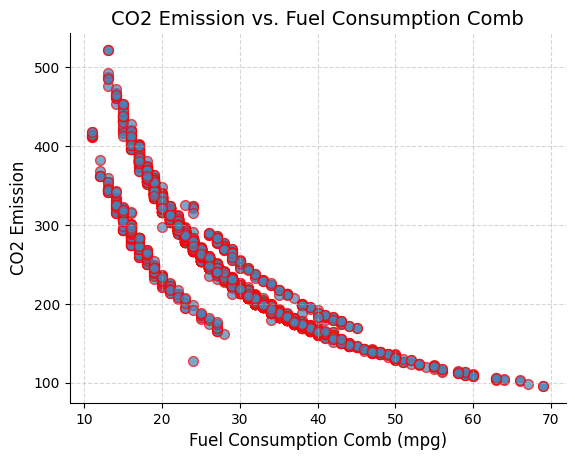

In [86]:
import matplotlib.pyplot as plt

# Set the marker color, size, and transparency
marker_color = 'steelblue'
marker_size = 50
marker_alpha = 0.7

# Plot the scatter plot of CO2 emission and Fuel Consumption Comb (mpg) variable in data
df_asli.plot.scatter(x='Fuel Consumption Comb (mpg)', y='CO2_emission', edgecolor='red', color=marker_color, s=marker_size, alpha=marker_alpha)

# Set labels and title
plt.xlabel("Fuel Consumption Comb (mpg)", fontsize=12)
plt.ylabel("CO2 Emission", fontsize=12)
plt.title("CO2 Emission vs. Fuel Consumption Comb", fontsize=14)

# Customize the grid
plt.grid(linestyle='--', alpha=0.5)

# Remove the trend line code here

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


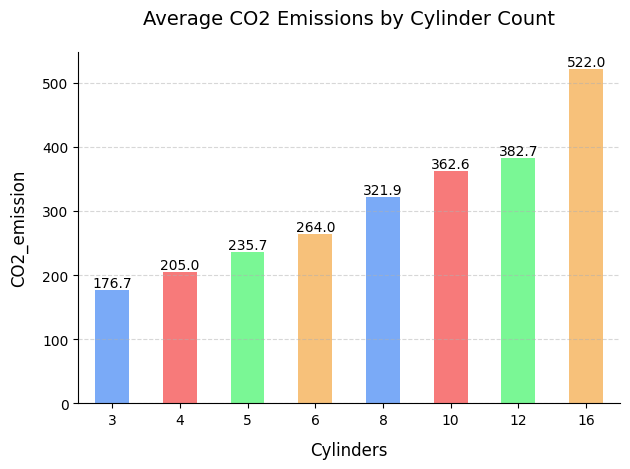

In [87]:
import matplotlib.pyplot as plt

# Set a custom color palette for the bars
colors = ['#4287f5', '#f54242', '#42f569', '#f5a742']

# Your existing code
ax = df_asli.groupby("Cylinders")["CO2_emission"].mean().plot.bar(color=colors, alpha=0.7)

# Add titles and labels
plt.xlabel("Cylinders", fontsize=12, labelpad=10)  # X-axis title with font size and padding
plt.ylabel("CO2_emission", fontsize=12, labelpad=10)  # Y-axis title with font size and padding
plt.title("Average CO2 Emissions by Cylinder Count", fontsize=14, pad=20)  # Plot title with font size and padding

# Customize the tick labels on the x-axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)

# Customize the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout()  # Adjust spacing to prevent overlapping elements
plt.show()


<ipython-input-88-40c1225af79c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Make", y="CO2_emission", data=df_asli, order=order, palette=colors, width=0.5)


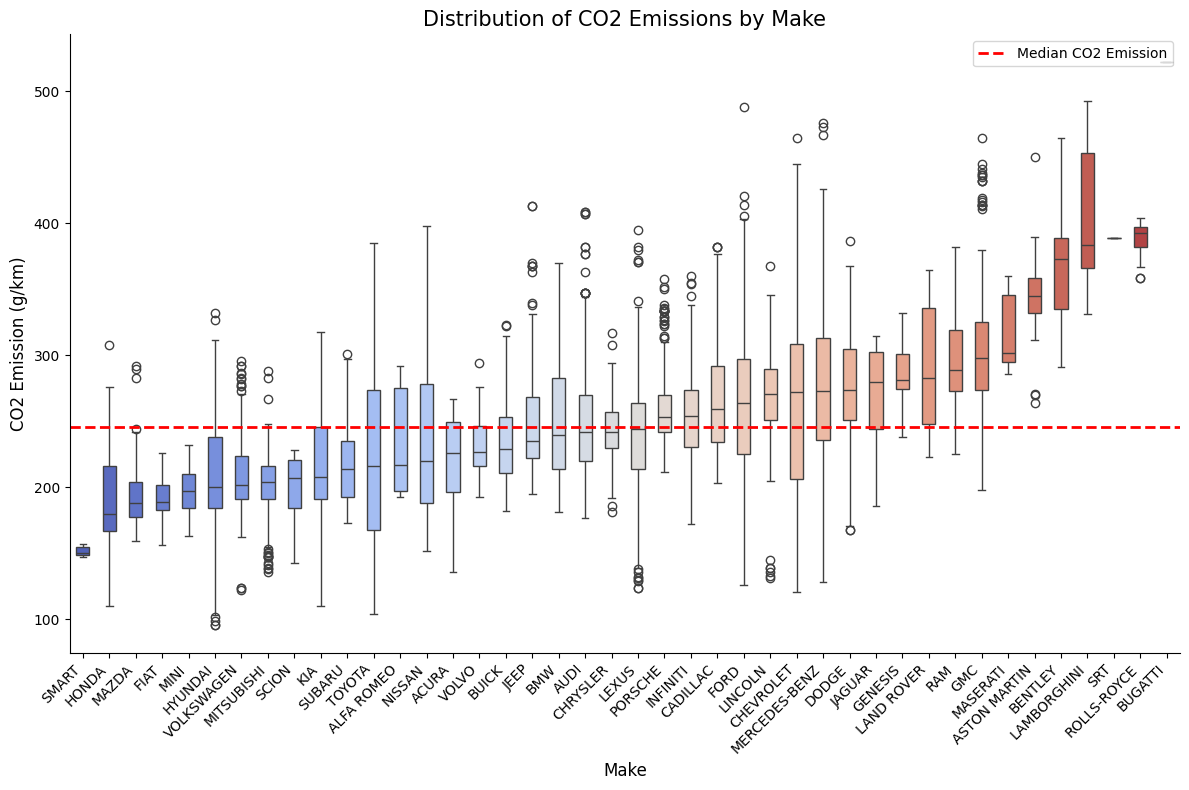

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
order = df_asli.groupby("Make")["CO2_emission"].median().sort_values(ascending=True).index

# Custom color palette
colors = sns.color_palette("coolwarm", len(order))

# Boxplot with custom colors
sns.boxplot(x="Make", y="CO2_emission", data=df_asli, order=order, palette=colors, width=0.5)

# Add a horizontal line for median
plt.axhline(df_asli["CO2_emission"].median(), color='r', linestyle='dashed', linewidth=2, label='Median CO2 Emission')

# Title and labels
plt.title("Distribution of CO2 Emissions by Make", fontsize=15)
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emission (g/km)", fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust spacing
plt.tight_layout()

# Legend
plt.legend(loc='upper right')

# Remove top and right spines
sns.despine()

# Find the indices of Buggati and Smart
buggati_idx = order.get_loc("BUGATTI") + 1
smart_idx = order.get_loc("SMART") + 1

# Get the median, 25th percentile, and 75th percentile for Buggati and Smart
buggati_stats = df_asli[df_asli["Make"] == "Buggati"]["CO2_emission"].describe()[["25%", "50%", "75%"]]
smart_stats = df_asli[df_asli["Make"] == "Smart"]["CO2_emission"].describe()[["25%", "50%", "75%"]]

# Add a rectangle shape for Buggati
plt.gca().add_patch(plt.Rectangle((buggati_idx - 0.25, buggati_stats["25%"]), 0.5, buggati_stats["75%"] - buggati_stats["25%"], fill=False, edgecolor='green', linewidth=2, label='Buggati'))

# Add a rectangle shape for Smart
plt.gca().add_patch(plt.Rectangle((smart_idx - 0.25, smart_stats["25%"]), 0.5, smart_stats["75%"] - smart_stats["25%"], fill=False, edgecolor='blue', linewidth=2, label='Smart'))

# Show the plot
plt.show()


<ipython-input-89-78786a77ee64>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vehicle Class", y="CO2_emission", data=df_asli, order=order, palette=colors, width=0.5)


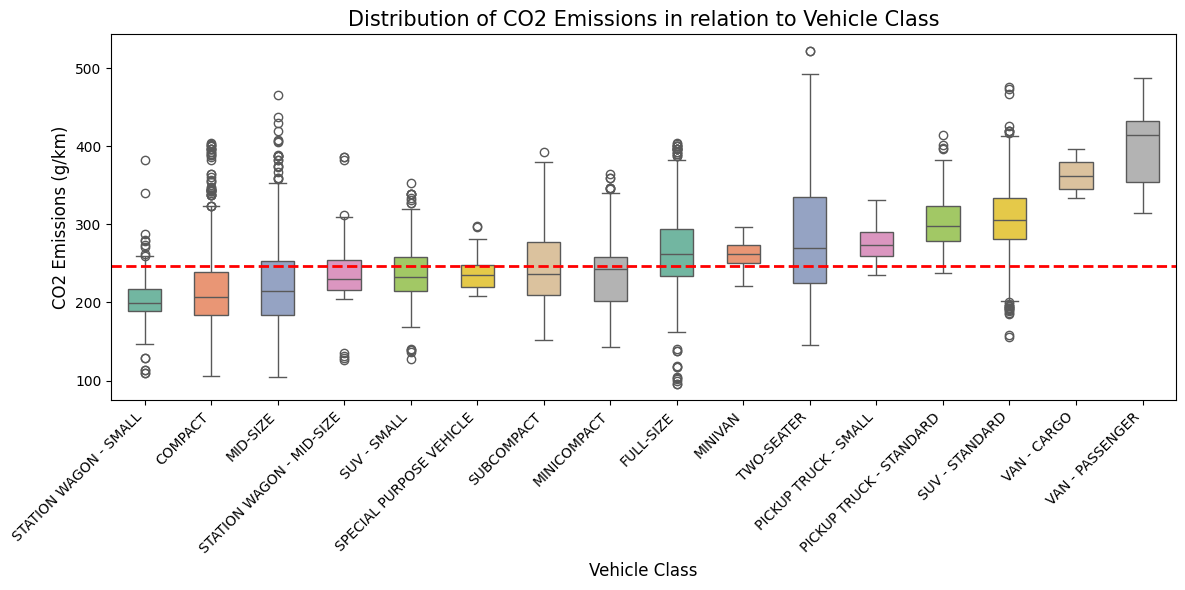

In [89]:
plt.figure(figsize=(12, 6))
order = df_asli.groupby("Vehicle Class")["CO2_emission"].median().sort_values(ascending=True).index

# Define custom color palette
colors = sns.color_palette("Set2", len(order))

# Plot the boxplot
sns.boxplot(x="Vehicle Class", y="CO2_emission", data=df_asli, order=order, palette=colors, width=0.5)

# Add title and axis labels
plt.title("Distribution of CO2 Emissions in relation to Vehicle Class", fontsize=15)
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions (g/km)", fontsize=12)

# Add a horizontal line for median CO2 emissions
plt.axhline(df_asli["CO2_emission"].median(), color='r', linestyle='dashed', linewidth=2)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


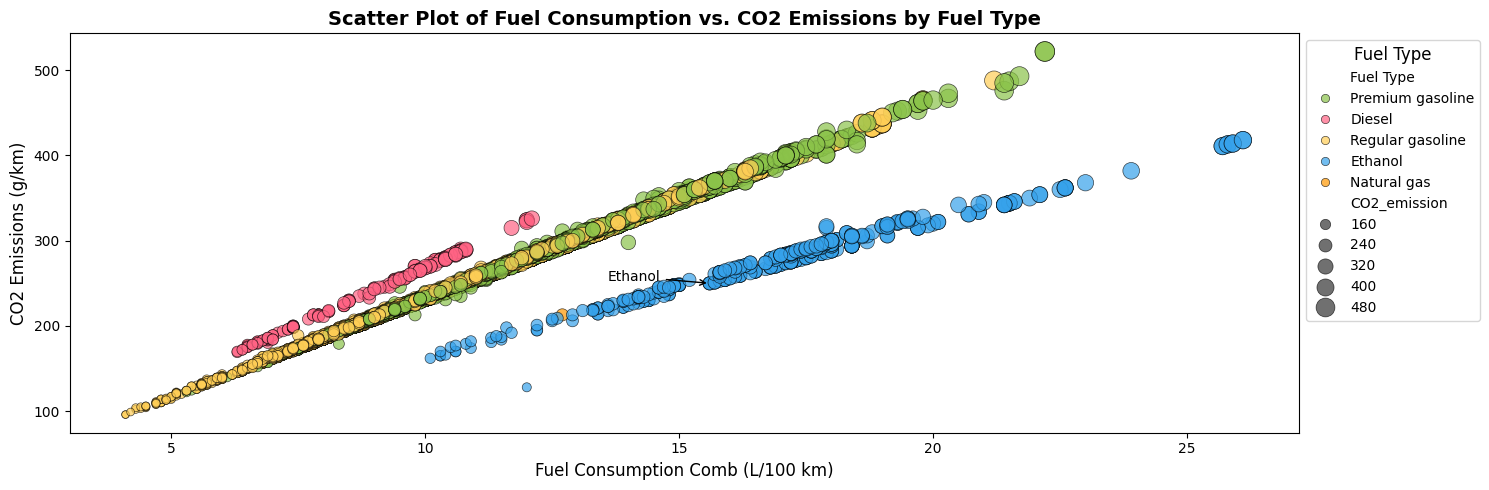

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette for the fuel types
custom_palette = {'Diesel': '#FF6384', 'Ethanol': '#36A2EB', 'Regular gasoline': '#FFCE56',
                  'Premium gasoline': '#8BC34A', 'Natural gas': '#FF9800'}

# Create the scatter plot
plt.figure(figsize=(15, 5))
sns.scatterplot(data=df_asli, x='Fuel Consumption Comb (L/100 km)', y='CO2_emission', hue='Fuel Type', size='CO2_emission',
                palette=custom_palette, sizes=(30, 200), edgecolor='black', linewidth=0.5, alpha=0.7)

# Customize the legend and axis labels
plt.legend(title='Fuel Type', title_fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)

# Add a title to the plot
plt.title('Scatter Plot of Fuel Consumption vs. CO2 Emissions by Fuel Type', fontsize=14, fontweight='bold')

# Add a visual key for Ethanol
ethanol_x = df_asli.loc[df_asli['Fuel Type'] == 'Ethanol', 'Fuel Consumption Comb (L/100 km)'].values[0]
ethanol_y = df_asli.loc[df_asli['Fuel Type'] == 'Ethanol', 'CO2_emission'].values[0]
plt.annotate('Ethanol', xy=(ethanol_x, ethanol_y), xytext=(ethanol_x-2, ethanol_y+3),
             arrowprops=dict(arrowstyle='->', lw=1, color='black'))

# Show the plot
plt.tight_layout()
plt.show()


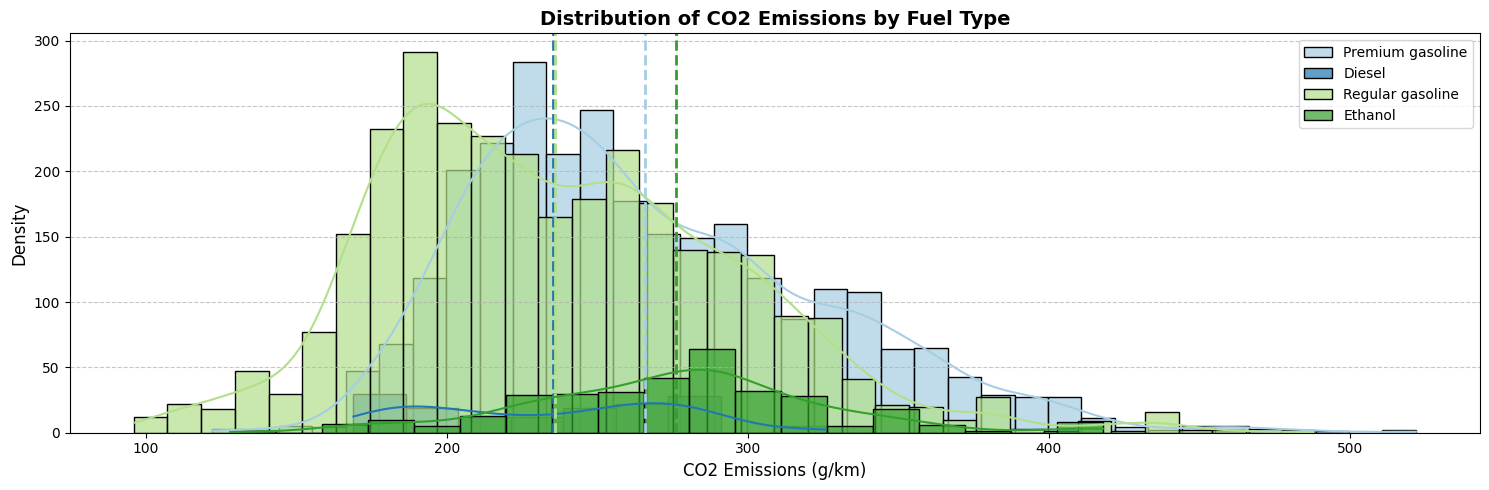

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette for each fuel type using seaborn's "Paired" palette
cmap = {
    'Premium gasoline': sns.color_palette('Paired')[0],
    'Diesel': sns.color_palette('Paired')[1],
    'Regular gasoline': sns.color_palette('Paired')[2],
    'Ethanol': sns.color_palette('Paired')[3],
}

# Create a figure and axes
plt.figure(figsize=(15, 5))

# Loop through each fuel type and plot its distribution
for fuel_type in df_asli[df_asli['Fuel Type'] != 'Natural gas']['Fuel Type'].unique():
    sns.histplot(df_asli[df_asli['Fuel Type'] == fuel_type]['CO2_emission'], label=fuel_type, color=cmap.get(fuel_type, 'gray'), kde=True, fill=True, alpha=0.7)
    plt.axvline(df_asli[df_asli['Fuel Type'] == fuel_type]['CO2_emission'].mean(), color=cmap.get(fuel_type, 'gray'), linestyle='dashed', linewidth=2)

# Customize the legend
plt.legend()

# Add labels and title to the plot
plt.xlabel('CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of CO2 Emissions by Fuel Type', fontsize=14, fontweight='bold')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


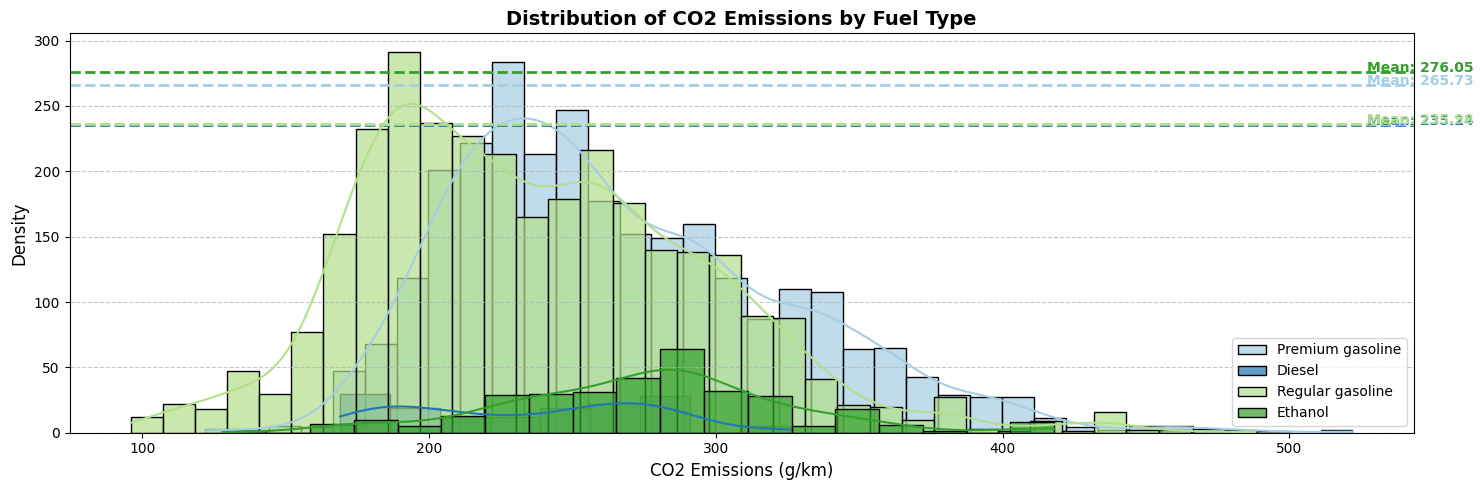

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define a custom color palette for each fuel type using seaborn's "Paired" palette
cmap = {
    'Premium gasoline': sns.color_palette('Paired')[0],
    'Diesel': sns.color_palette('Paired')[1],
    'Regular gasoline': sns.color_palette('Paired')[2],
    'Ethanol': sns.color_palette('Paired')[3],
}

# Create a figure and axes
plt.figure(figsize=(15, 5))

# Loop through each fuel type and plot its distribution
for fuel_type in df_asli[df_asli['Fuel Type'] != 'Natural gas']['Fuel Type'].unique():
    sns.histplot(df_asli[df_asli['Fuel Type'] == fuel_type]['CO2_emission'], label=fuel_type, color=cmap.get(fuel_type, 'gray'), kde=True, fill=True, alpha=0.7)
    mean_value = np.mean(df_asli[df_asli['Fuel Type'] == fuel_type]['CO2_emission'])
    plt.axhline(mean_value, color=cmap.get(fuel_type, 'gray'), linestyle='dashed', linewidth=2)
    plt.text(df_asli['CO2_emission'].max() + 5, mean_value, f"Mean: {mean_value:.2f}", color=cmap.get(fuel_type, 'gray'), fontsize=10, fontweight='bold')

# Customize the legend
plt.legend()

# Add labels and title to the plot
plt.xlabel('CO2 Emissions (g/km)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of CO2 Emissions by Fuel Type', fontsize=14, fontweight='bold')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


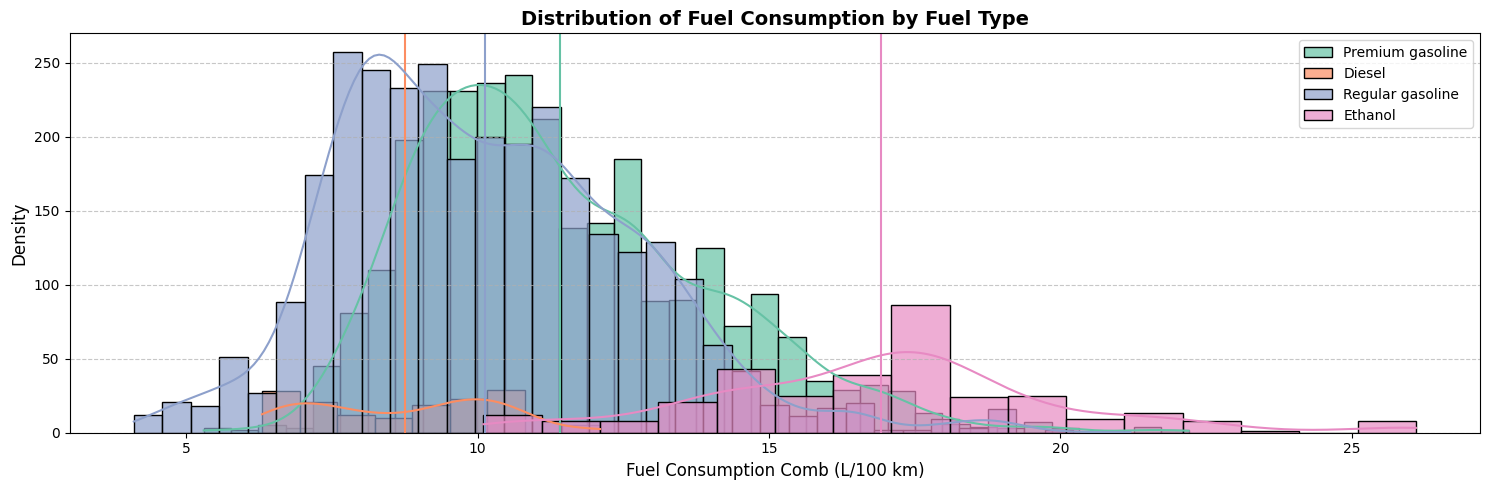

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom color palette for each fuel type using seaborn's "Set2" palette
cmap = {
    'Premium gasoline': sns.color_palette('Set2')[0],
    'Diesel': sns.color_palette('Set2')[1],
    'Regular gasoline': sns.color_palette('Set2')[2],
    'Ethanol': sns.color_palette('Set2')[3],
}

# Create a figure and axes
plt.figure(figsize=(15, 5))

# Loop through each fuel type and plot its distribution
for fuel_type in df_asli[df_asli['Fuel Type'] != 'Natural gas']['Fuel Type'].unique():
    sns.histplot(df_asli[df_asli['Fuel Type'] == fuel_type]['Fuel Consumption Comb (L/100 km)'],
                 label=fuel_type, color=cmap.get(fuel_type, 'gray'), kde=True, alpha=0.7)
    plt.axvline(df_asli[df_asli['Fuel Type'] == fuel_type]['Fuel Consumption Comb (L/100 km)'].mean(),
                color=cmap.get(fuel_type, 'gray'))

# Customize the legend
plt.legend()

# Add labels and title to the plot
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Fuel Consumption by Fuel Type', fontsize=14, fontweight='bold')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Data Preprocessing

In [94]:
df1 =pd.get_dummies(df['Fuel Type'], prefix='Fuel', drop_first=True)
df2 = pd.get_dummies(df["Transmission"], drop_first=True)
df1.head()

,Fuel_Ethanol,Fuel_Natural gas,Fuel_Premium gasoline,Fuel_Regular gasoline
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [95]:
df_new= [df,df1,df2]

data = pd.concat(df_new, axis=1)
data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2_emission,Fuel_Ethanol,Fuel_Natural gas,Fuel_Premium gasoline,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
0,ACURA,ILX,COMPACT,0.693147,1.386294,Automatic of Selective type,Premium gasoline,2.292535,1.902108,2.140066,3.496508,196,False,False,True,False,False,True,False,False
1,ACURA,ILX,COMPACT,2.400000,4.000000,Manual,Premium gasoline,11.200000,7.700000,9.600000,29.000000,221,False,False,True,False,False,False,False,True
2,ACURA,ILX HYBRID,COMPACT,1.500000,4.000000,CVT,Premium gasoline,6.000000,5.800000,5.900000,48.000000,136,False,False,True,False,False,False,True,False
3,ACURA,MDX 4WD,SUV - SMALL,3.500000,6.000000,Automatic of Selective type,Premium gasoline,12.700000,9.100000,11.100000,25.000000,255,False,False,True,False,False,True,False,False
4,ACURA,RDX AWD,SUV - SMALL,3.500000,6.000000,Automatic of Selective type,Premium gasoline,12.100000,8.700000,10.600000,27.000000,244,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.000000,4.000000,Automatic of Selective type,Premium gasoline,10.700000,7.700000,9.400000,30.000000,219,False,False,True,False,False,True,False,False
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.000000,4.000000,Automatic of Selective type,Premium gasoline,11.200000,8.300000,9.900000,29.000000,232,False,False,True,False,False,True,False,False
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.000000,4.000000,Automatic of Selective type,Premium gasoline,11.700000,8.600000,10.300000,27.000000,240,False,False,True,False,False,True,False,False
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.000000,4.000000,Automatic of Selective type,Premium gasoline,11.200000,8.300000,9.900000,29.000000,232,False,False,True,False,False,True,False,False


In [96]:
data.drop(['Fuel Type'], inplace=True, axis=1)
data.drop(['Transmission'], inplace=True, axis=1)

In [97]:
df_freq = data['Make'].value_counts().to_dict()
mod_freq = data['Model'].value_counts().to_dict()
veh_freq = data['Vehicle Class'].value_counts().to_dict()

In [98]:
data['Make'] = data['Make'].map(df_freq)
data['Model'] = data['Model'].map(mod_freq)
data['Vehicle Class'] = data['Vehicle Class'].map(veh_freq)

# MODEL

In [99]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 42)

In [100]:
# split train test
from sklearn.model_selection import train_test_split

y_train = df_train.pop('CO2_emission')
X_train = df_train

In [101]:
y_test = df_test.pop('CO2_emission')
X_test = df_test

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Fuel Consumption Comb (mpg)','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Engine Size(L)','Cylinders']
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])


In [103]:
mean = np.mean(y_test)
std_deviation = np.std(y_test)
# Melakukan transformasi ke-nilai-z pada y_train
y_test = (y_test - mean) / std_deviation



In [104]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Fuel Consumption Comb (mpg)','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Engine Size(L)','Cylinders']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [105]:
# Menghitung rata-rata dan standar deviasi dari y_train
mean = np.mean(y_train)
std_deviation = np.std(y_train)

# Melakukan transformasi ke-nilai-z pada y_train
y_train = (y_train - mean) / std_deviation

In [106]:
X_train = X_train.drop(columns=['Fuel_Natural gas'])
X_test = X_test.drop(columns=['Fuel_Natural gas'])

# Handling Multicolinearity

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

#X = add_constant(X_train)

#vif_df = pd.DataFrame([vif(X.values, i)
               #for i in range(X.shape[1])],
              #index=X.columns).reset_index()
#vif_df.columns = ['feature','vif_score']
#vif_df = vif_df.loc[vif_df.feature!='const']
#vif_df

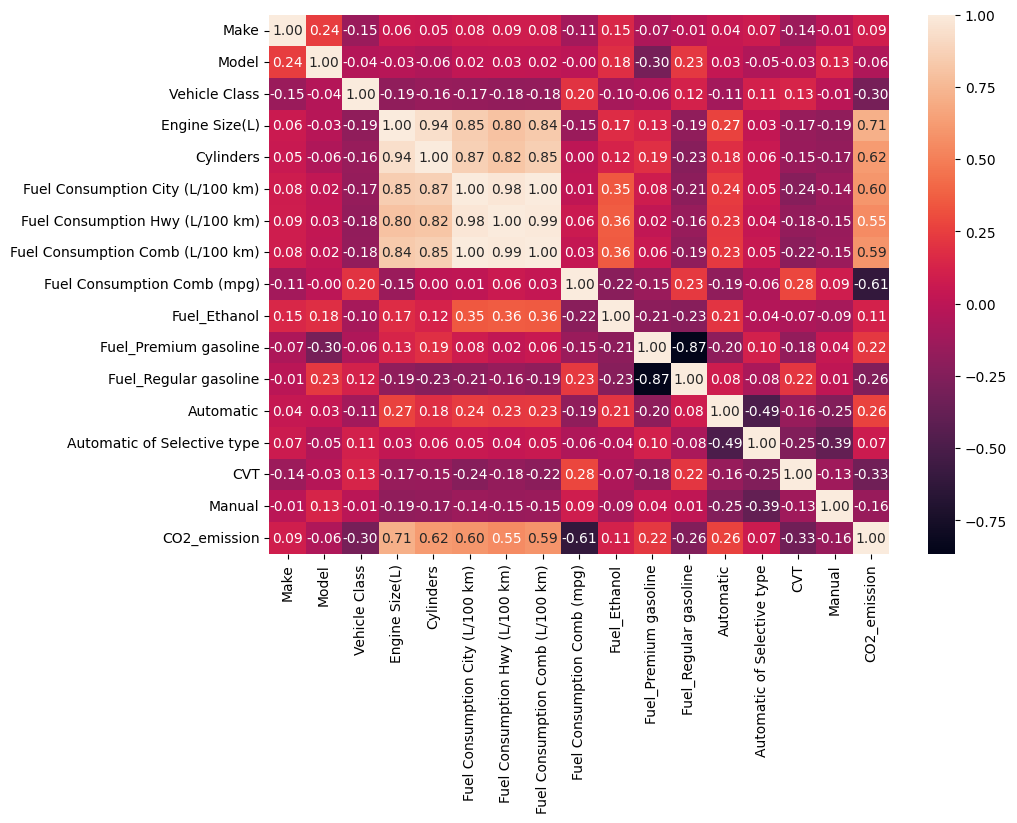

In [108]:
admit_train = pd.concat([X_train, y_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [109]:
X_train = X_train.drop(columns=['Fuel Consumption City (L/100 km)'])
X_test = X_test.drop(columns=['Fuel Consumption City (L/100 km)'])

In [110]:
X_train = X_train.drop(columns=['Fuel Consumption Comb (L/100 km)'])
X_test = X_test.drop(columns=['Fuel Consumption Comb (L/100 km)'])

In [111]:
X_train = X_train.drop(columns=['Engine Size(L)'])
X_test = X_test.drop(columns=['Engine Size(L)'])

In [112]:
X_train = X_train.drop(columns=['Fuel Consumption Hwy (L/100 km)'])
X_test = X_test.drop(columns=['Fuel Consumption Hwy (L/100 km)'])

In [113]:
X_train = X_train.drop(columns=['Fuel_Premium gasoline'])
X_test = X_test.drop(columns=['Fuel_Premium gasoline'])

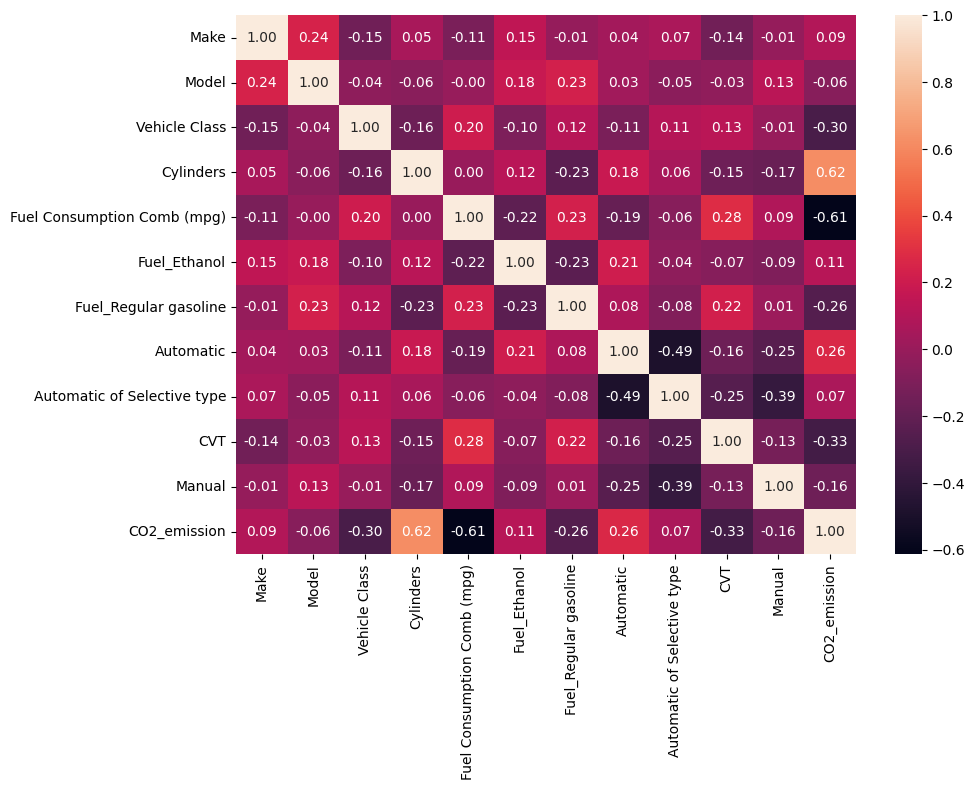

In [114]:
admit_train = pd.concat([X_train, y_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [115]:
X_train

,Make,Model,Vehicle Class,Cylinders,Fuel Consumption Comb (mpg),Fuel_Ethanol,Fuel_Regular gasoline,Automatic,Automatic of Selective type,CVT,Manual
1788,213,4,613,0.633074,0.237039,False,True,True,False,False,False
4541,129,2,1006,0.266148,0.431838,False,False,False,True,False,False
3372,180,9,508,0.633074,0.318205,False,False,True,False,False,False
2575,118,5,381,0.449611,0.318205,False,False,False,False,False,True
3516,289,10,475,0.633074,0.237039,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3772,127,7,983,0.266148,0.513004,False,True,False,False,False,True
5191,164,2,903,0.266148,0.577936,False,False,False,False,False,True
5226,184,5,508,0.266148,0.480537,False,True,False,False,False,True
5390,127,6,903,0.266148,0.529237,False,True,False,False,False,True


# RFE

In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe_lm = RFE(lm, n_features_to_select=12)
rfe_lm = rfe_lm.fit(X_train, y_train)

# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rfe_rf = RFE(rf, n_features_to_select=12)
rfe_rf = rfe_rf.fit(X_train, y_train)

# XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
rfe_xgb = RFE(xgb, n_features_to_select=12)
rfe_xgb = rfe_xgb.fit(X_train, y_train)


In [117]:
# Mendapatkan fitur yang dipilih oleh RFE pada Linear Regression
selected_features_lm = X_train.columns[rfe_lm.support_].tolist()
print("Selected Features (Linear Regression):")
print(selected_features_lm)

# Mendapatkan fitur yang dipilih oleh RFE pada Random Forest Regressor
selected_features_rf = X_train.columns[rfe_rf.support_].tolist()
print("Selected Features (Random Forest Regressor):")
print(selected_features_rf)

# Mendapatkan fitur yang dipilih oleh RFE pada XGBoost Regressor
selected_features_xgb = X_train.columns[rfe_xgb.support_].tolist()
print("Selected Features (XGBoost Regressor):")
print(selected_features_xgb)


Selected Features (Linear Regression):
['Make', 'Model', 'Vehicle Class', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'Fuel_Ethanol', 'Fuel_Regular gasoline', 'Automatic', 'Automatic of Selective type', 'CVT', 'Manual']
Selected Features (Random Forest Regressor):
['Make', 'Model', 'Vehicle Class', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'Fuel_Ethanol', 'Fuel_Regular gasoline', 'Automatic', 'Automatic of Selective type', 'CVT', 'Manual']
Selected Features (XGBoost Regressor):
['Make', 'Model', 'Vehicle Class', 'Cylinders', 'Fuel Consumption Comb (mpg)', 'Fuel_Ethanol', 'Fuel_Regular gasoline', 'Automatic', 'Automatic of Selective type', 'CVT', 'Manual']


In [118]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions for each model
y_pred_lm = rfe_lm.predict(X_test)
y_pred_rf = rfe_rf.predict(X_test)
y_pred_xgb = rfe_xgb.predict(X_test)

# Calculate MSE for each model
mse_lm = mean_squared_error(y_test, y_pred_lm)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

# Calculate R2 for each model
r2_lr = r2_score(y_test, y_pred_lm)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the MSE and R2 for each model
print("Linear Regression:")
print("MSE:", mse_lm)
print("R2:", r2_lr)
print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R2:", r2_rf)
print("\nXGBoost Regressor:")
print("MSE:", mse_xgb)
print("R2:", r2_xgb)


Linear Regression:
MSE: 0.2419212594498941
R2: 0.7580787405501059

Random Forest Regressor:
MSE: 0.012864510332150296
R2: 0.9871354896678497

XGBoost Regressor:
MSE: 0.012684962222744773
R2: 0.9873150377772553


In [119]:
mse_linear = mean_squared_error(y_test, y_pred_lm)
mae_linear = mean_absolute_error(y_test, y_pred_lm)
r2_linear = r2_score(y_test, y_pred_lm)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgboost = mean_squared_error(y_test, y_pred_xgb)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgb)
r2_xgboost = r2_score(y_test, y_pred_xgb)



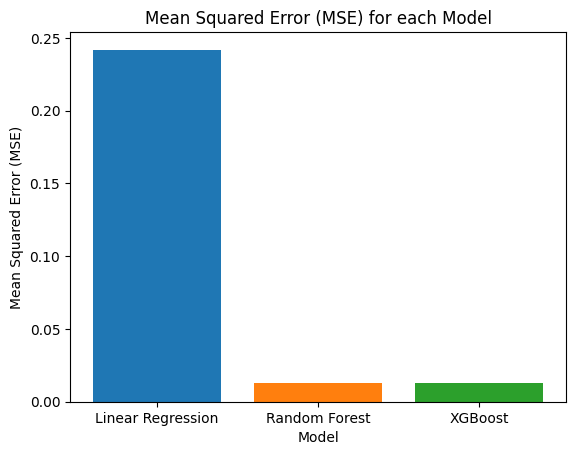

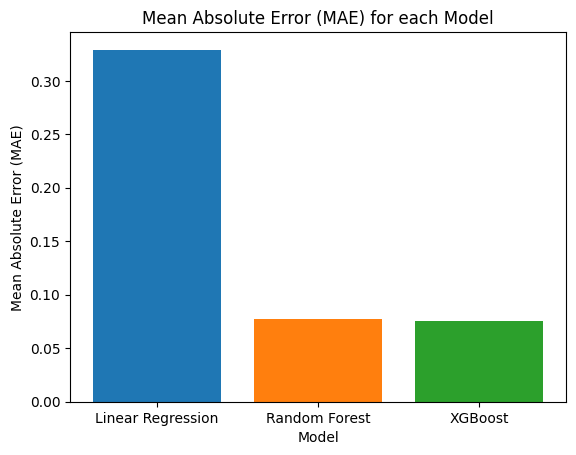

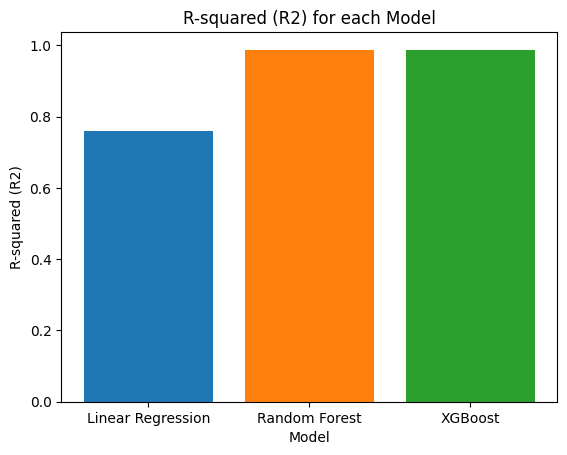

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Plot evaluasi untuk masing-masing model
models = ['Linear Regression', 'Random Forest', 'XGBoost']
mse_scores = [mse_linear, mse_rf, mse_xgboost]
mae_scores = [mae_linear, mae_rf, mae_xgboost]
r2_scores = [r2_linear, r2_rf, r2_xgboost]

# Warna untuk setiap model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot MSE scores
plt.bar(models, mse_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for each Model')

# Anotasi pada bar chart
for i, mse in enumerate(mse_scores):
    plt.text(i, mse, f"{mse:.2f}", ha='center', va='bottom', fontweight='bold', color='white')

plt.show()

# Plot MAE scores
plt.bar(models, mae_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for each Model')

# Anotasi pada bar chart
for i, mae in enumerate(mae_scores):
    plt.text(i, mae, f"{mae:.2f}", ha='center', va='bottom', fontweight='bold', color='white')

plt.show()

# Plot R-squared scores
plt.bar(models, r2_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) for each Model')

# Anotasi pada bar chart
for i, r2 in enumerate(r2_scores):
    plt.text(i, r2, f"{r2:.2f}", ha='center', va='bottom', fontweight='bold', color='white')

plt.show()


In [121]:
import seaborn as sns


def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.show()


def plot_scatter_actual_vs_pred(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot: Actual vs. Predicted', fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

def plot_residuals_distribution(residuals):
    plt.figure(figsize=(10, 6))

    # Histogram plot with KDE (Kernel Density Estimation)
    sns.histplot(residuals, kde=True, color='skyblue', edgecolor='k', linewidth=1.5)

    # Vertical line for mean residual
    mean_residual = residuals.mean()
    plt.axvline(mean_residual, color='red', linestyle='dashed', label='Mean Residual')

    # Title and labels
    plt.xlabel('Residuals', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Residuals', fontsize=16)

    # Legend
    plt.legend()

    # Grid lines
    plt.grid(True, alpha=0.3)

    # Adjust plot layout
    plt.tight_layout()

    # Show the plot
    plt.show()

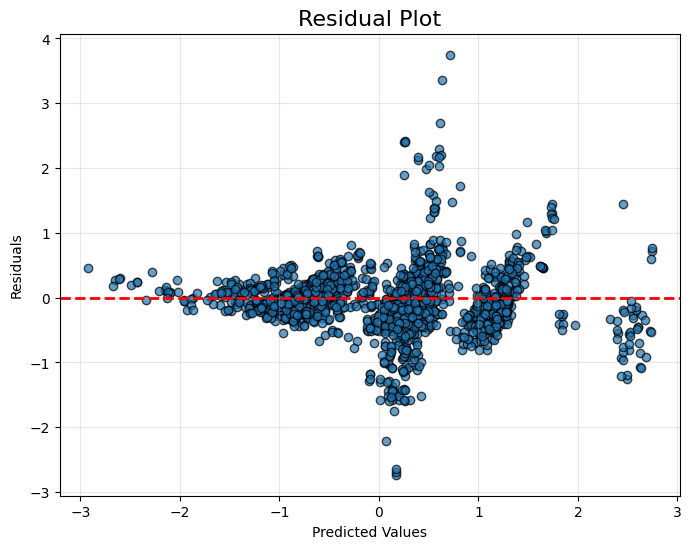

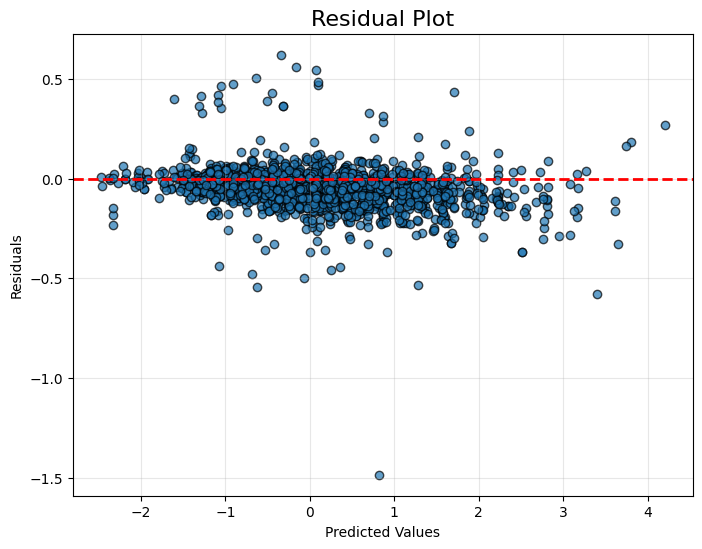

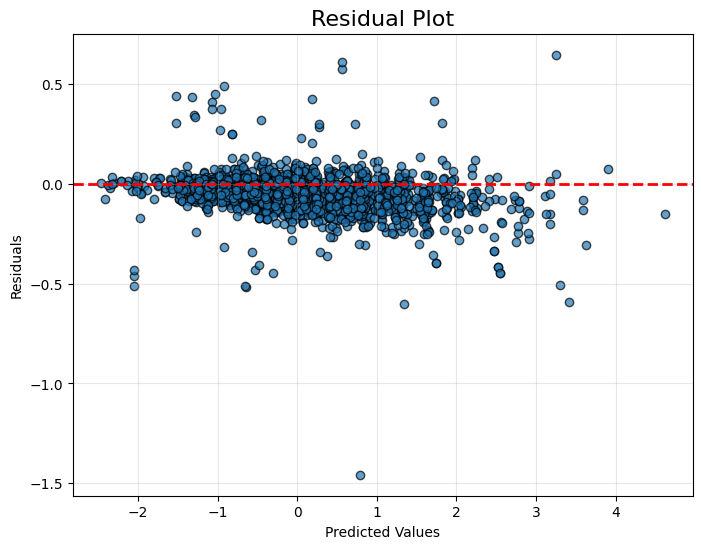

In [122]:

plot_residuals(y_test, y_pred_lm)
plot_residuals(y_test, y_pred_rf)
plot_residuals(y_test, y_pred_xgb)


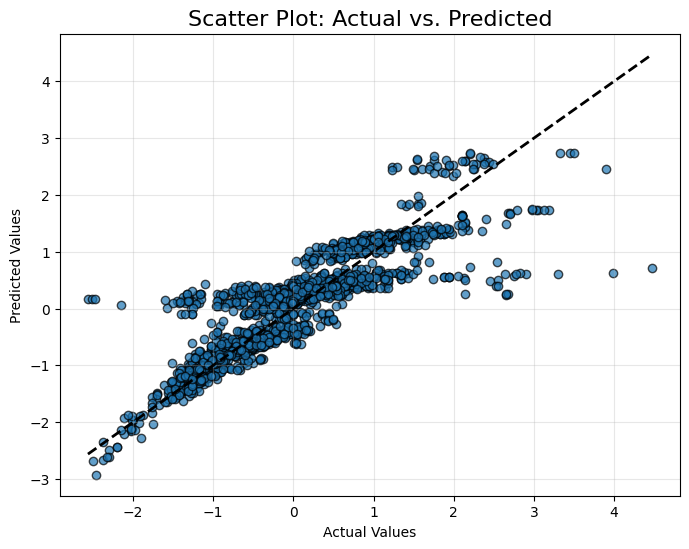

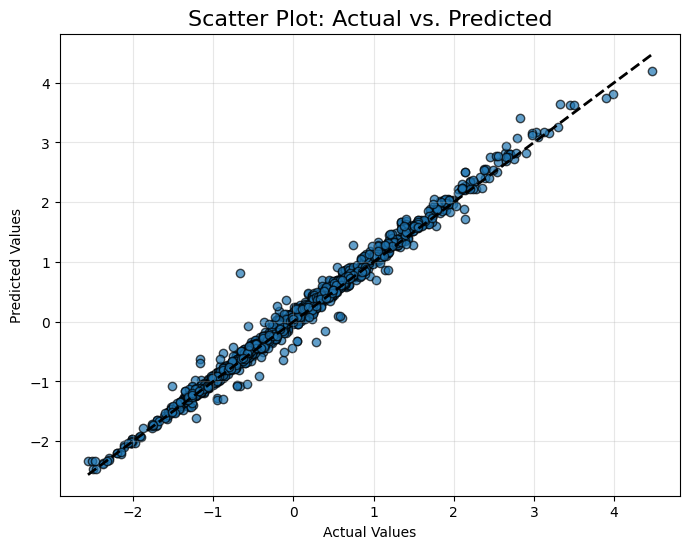

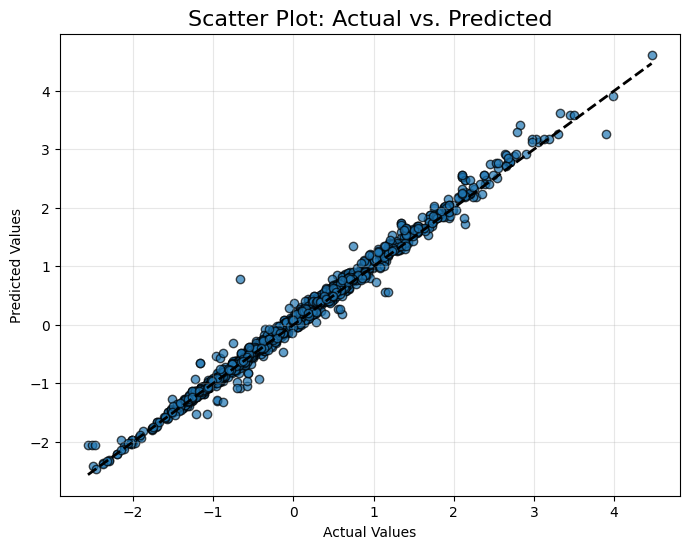

In [123]:
plot_scatter_actual_vs_pred(y_test, y_pred_lm)
plot_scatter_actual_vs_pred(y_test, y_pred_rf)
plot_scatter_actual_vs_pred(y_test, y_pred_xgb)

In [124]:
residuals_lr = y_test - y_pred_lm
residuals_rf = y_test - y_pred_rf
residuals_xgb = y_test - y_pred_xgb

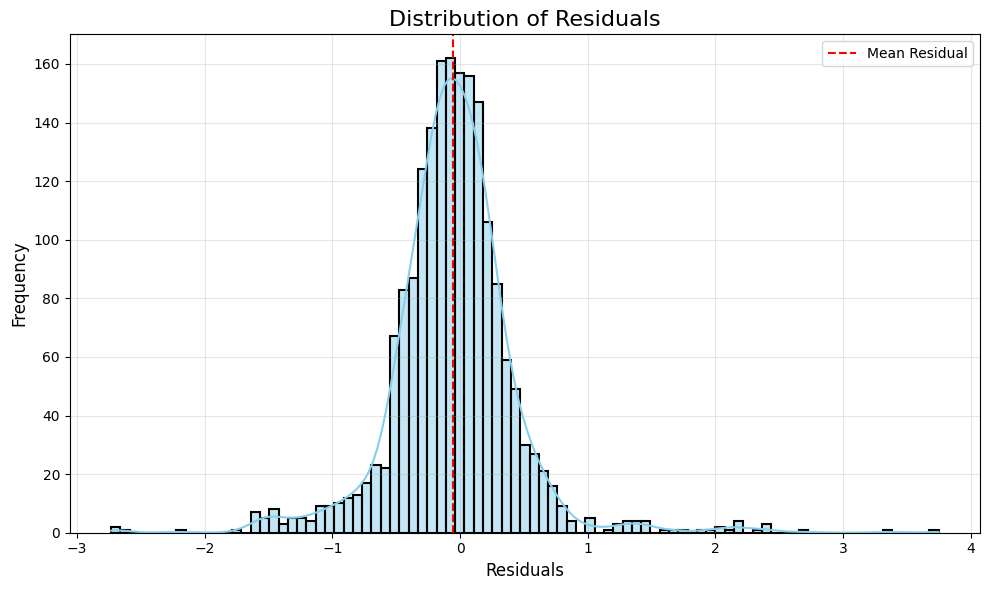

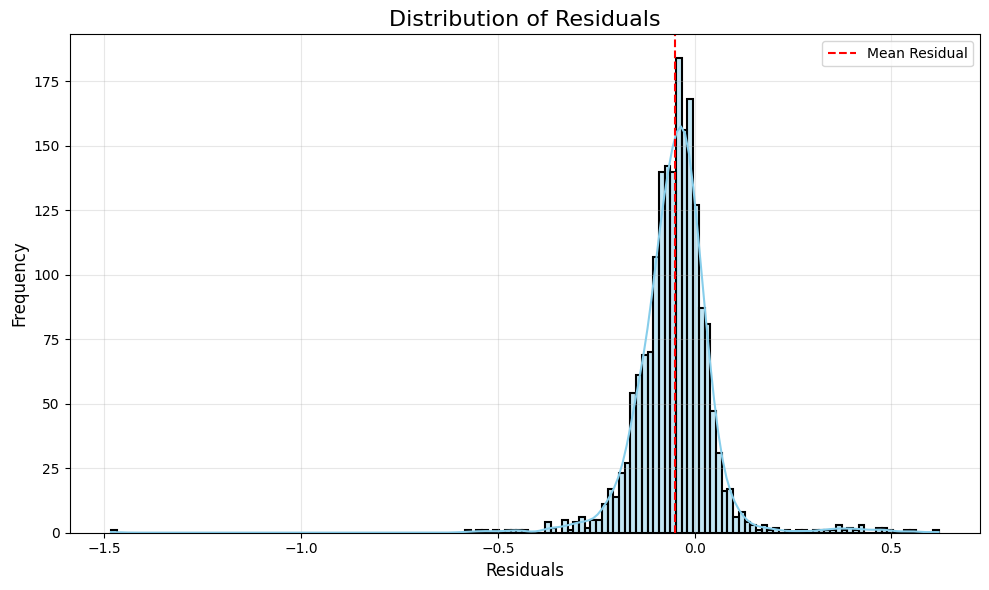

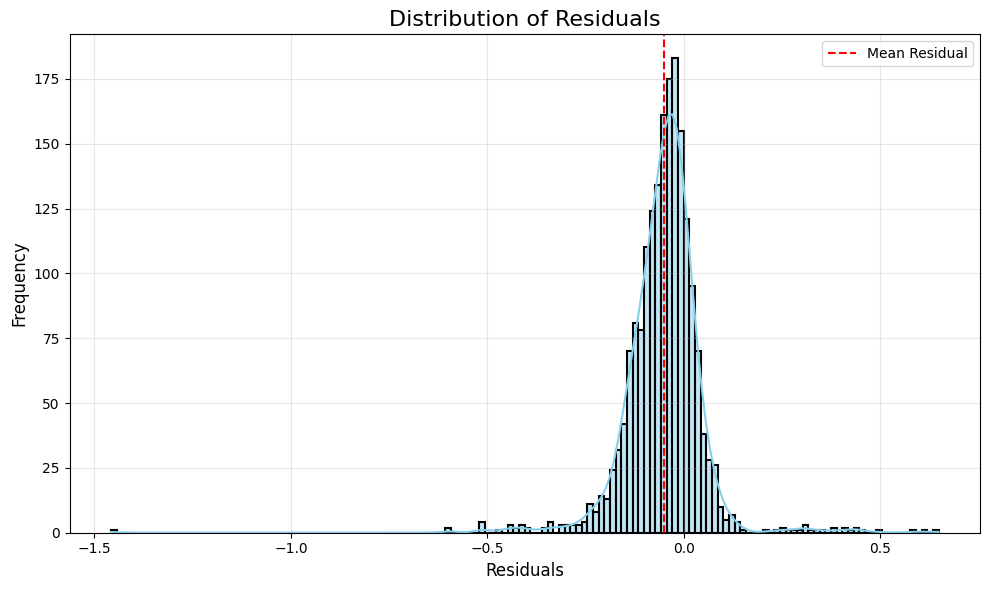

In [125]:
plot_residuals_distribution(residuals_lr)
plot_residuals_distribution(residuals_rf)
plot_residuals_distribution(residuals_xgb)

In [126]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred_lm))
print(r2_score(y_test, y_pred_rf))
print(r2_score(y_test, y_pred_xgb))

0.7580787405501059
0.9871354896678497
0.9873150377772553


In [127]:
from sklearn.metrics import mean_squared_error
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_lm))))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_rf))))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_pred_xgb))))

RMSE for testing data is 0.49185491707402307
RMSE for testing data is 0.11342182476115563
RMSE for testing data is 0.11262753758626162


In [128]:
print(mae_linear)
print(mae_rf)
print(mae_xgboost)

0.32907180985116974
0.07709528659361023
0.0753884327738629


# INTERPRETASI MENGGUNAKAN FEATURE IMPORTANCE

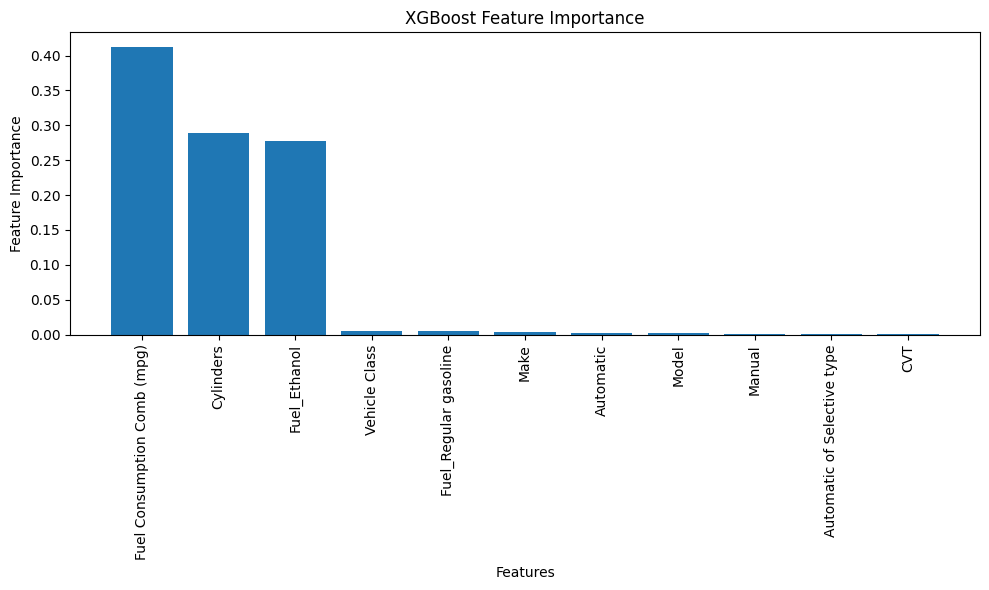

In [129]:
import matplotlib.pyplot as plt

# Obtain feature importance
feature_importance = xgb.feature_importances_

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features_xgb)), feature_importance[sorted_idx])
plt.xticks(range(len(selected_features_xgb)), np.array(selected_features_xgb)[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()


In [130]:
!pip install pycebox

In [131]:
#from pdpbox import pdp, get_dataset, info_plots


# Create partial dependence plots
#for feature in selected_features_xgb:
    #pdp_feature = pdp.pdp_isolate(model=xgb, dataset=X_train, model_features=selected_features_xgb, feature=feature)
    #pdp.pdp_plot(pdp_feature, feature)
    #plt.show()

# Create individual conditional expectation plots
#for feature in selected_features_xgb:
    #pdp_feature = pdp.pdp_isolate(model=xgb, dataset=X_train, model_features=selected_features_xgb, feature=feature)
    #pdp.pdp_plot(pdp_feature, feature, plot_lines=True, frac_to_plot=0.5)
    #plt.show()


In [132]:
feature_importance = rfe_xgb.estimator_.feature_importances_
feature_importance

array([0.00443105, 0.00190802, 0.00517315, 0.28874213, 0.41275832,
       0.2778392 , 0.00450071, 0.0022006 , 0.00086594, 0.00065464,
       0.00092636], dtype=float32)

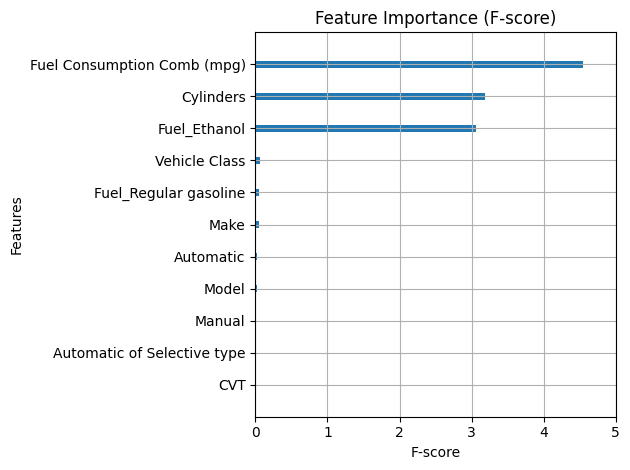

In [133]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Train your XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

# Plot the feature importance using F-score
xgb.plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.xlabel('F-score')
plt.ylabel('Features')
plt.title('Feature Importance (F-score)')
plt.tight_layout()
plt.show()


In [134]:
feature_importance = xgb_model.get_booster().get_score(importance_type='gain')
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"Feature: {feature}, Gain Importance: {importance}")


Feature: Fuel Consumption Comb (mpg), Gain Importance: 4.551557540893555
Feature: Cylinders, Gain Importance: 3.184009313583374
Feature: Fuel_Ethanol, Gain Importance: 3.0637810230255127
Feature: Vehicle Class, Gain Importance: 0.057045213878154755
Feature: Fuel_Regular gasoline, Gain Importance: 0.0496300645172596
Feature: Make, Gain Importance: 0.04886192828416824
Feature: Automatic, Gain Importance: 0.02426641806960106
Feature: Model, Gain Importance: 0.021040091291069984
Feature: Manual, Gain Importance: 0.010215171612799168
Feature: Automatic of Selective type, Gain Importance: 0.009548923932015896
Feature: CVT, Gain Importance: 0.007218821439892054


SHAP

In [135]:
import shap

In [136]:

# Plot SHAP summary plot with dot plot type
#shap.summary_plot(shap_values, X_train, plot_type='dot', show=False)
#plt.title("SHAP Feature Importance")
#plt.tight_layout()
#plt.show()


In [137]:
!pip install --upgrade xgboost


In [138]:
!pip install --upgrade shap


In [140]:
# Create the Explanation object
#explanation = shap.Explanation(values=shap_values[0], data=X_test.iloc[0], feature_names=X_test.columns)

# Plot the bar chart
#shap.plots.bar(explanation)


In [141]:
# Create the explainer object
#explainer = shap.Explainer(xgb_model)

# Calculate the SHAP values
#shap_values = explainer.shap_values(X_test)

# Create the Explanation object
#explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0])

# Plot the waterfall for a specific instance (e.g., index 0)
#shap.waterfall_plot(explanation, max_display=12, show=True)

In [142]:
import shap

# Create the Explanation object
##explanation = shap.Explanation(values=shap_values, data=X_test, feature_names=X_test.columns)

# Plot the beeswarm plot
#shap.plots.beeswarm(explanation)


In [143]:
#for name in ["Cylinders"]:
    #shap.dependence_plot(name, shap_values, X_test, display_features=None)

In [144]:
#for name in ["Fuel Consumption Comb (mpg)"]:
    #shap.dependence_plot(name, shap_values, X_test, display_features=None)

In [145]:
#for name in ["Fuel_Ethanol"]:
    #shap.dependence_plot(name, shap_values, X_test, display_features=None)